# 필요한 라이브러리 설치

In [2]:
#그래프 깨질 시 한글 깨짐 막기 위해 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행 후 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (22.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and di

In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:12 http://ppa.launchpad.net/cran/libgit2/u

bash: line 5: fg: no job control


In [2]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.l

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2921k      0 --:--:-- --:--:-- --:--:-- 2921k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [26]:
import pandas as pd
import numpy as np
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# 데이터 불러오기

In [27]:
df = pd.read_csv('/content/drive/MyDrive/리뷰마이닝/reviews_맞춤법 수정.csv')

In [28]:
df.iloc[793, -1] = 1

In [29]:
df

,date,review,rate
0,2022-02-24 00:00:00,선물로 줬는데 사용해보니 정말 만족스럽다고 하네요.,1
1,2022-02-24 00:00:00,추천합니다,1
2,2022-02-22 00:00:00,배송도 빠르고,1
3,2022-02-22 00:00:00,기사님도 친절하셨어요.,1
4,2022-02-22 00:00:00,디자인 너무너무 맘에 들고요.,1
...,...,...,...
1426,2022-01-18 00:00:00,디자인도 공기청정기 중 가장 이쁜 거 같아요,1
1427,2022-01-18 00:00:00,디자인이 너무 예뻐요,1
1428,2022-01-18 00:00:00,선물시켰는데 받는 이가 좋아하네요,1
1429,2022-01-17 00:00:00,배송이 늦었지만,-1


In [30]:
X = df.iloc[:, 1]

# 형태소 분석

In [31]:
mecab = Mecab()
raw_tokens_list = []; raw_tokens_append = raw_tokens_list.append
for index in range(len(X)):
    temp_comment = X[index]
    raw_tokens_append(mecab.pos(temp_comment))

In [32]:
clean_tokens_list = []; clean_tokens_append = clean_tokens_list.append
for i in range(len(raw_tokens_list)):
    temp_raw_tokens = raw_tokens_list[i]
    temp_clean_tokens = []
    for tup in temp_raw_tokens:
        if tup[1] in ['NNG', 'NNP']:
            temp_clean_tokens.append(tup[0])
    clean_tokens_append(temp_clean_tokens)

In [33]:
clean_tokens_list

[['선물', '사용', '만족'],
 ['추천'],
 ['배송'],
 ['기사', '친절'],
 ['디자인', '맘'],
 ['엘지'],
 ['오후', '주문', '다음', '날', '배송', '설치', '완료'],
 ['기사', '설명', '필터', '관련', '설명'],
 ['만족'],
 ['인기'],
 ['주문', '후', '달'],
 ['집', '입주', '유해', '물질', '걱정'],
 ['미세먼지', '공기', '청정기', '필수'],
 ['에어', '타워', '강점', '절정', '청정', '기능'],
 ['기존', '제품', '대비', '디자인'],
 ['잠실', '롯', '타워'],
 ['집', '인테리어', '포인트'],
 ['마지막', '온풍', '기능', '겨울철', '자녀', '때', '공기', '추위'],
 ['배송'],
 ['선물', '만족'],
 [],
 ['필터', '여유'],
 ['디자인'],
 [],
 [],
 ['때', '온풍', '기능'],
 ['오늘', '날', '다음', '겨울'],
 ['핫', '딜', '히', '구매'],
 ['감사'],
 ['진작'],
 [],
 ['사용'],
 ['재방'],
 [],
 ['공기', '청정기', '온풍', '사용', '에어', '타워', '주문'],
 ['때', '아이', '방', '사용'],
 ['날씨', '거실', '공기', '청정기', '사용'],
 ['사용', '돈', '인생', '템'],
 ['추천'],
 ['디자인', '성능', '맘'],
 ['크기'],
 ['소음'],
 ['배송'],
 ['설치'],
 ['온풍', '기능'],
 ['디자인', '말', '인테리어', '최고'],
 ['리모컨'],
 ['부착'],
 ['배송'],
 ['아들'],
 ['디자인'],
 ['아파트', '아트', '월', '찰떡'],
 ['고민', '배송'],
 ['맘'],
 ['배송', '직원', '친절'],
 ['배송'],
 ['제품'],
 ['만족'],
 ['바람'],
 [],
 ['온풍

In [34]:
stopwords = ['약간' , '최근' , '딸' , '밍' , '부' , '때' , '후' , '달' , '친언니' , '전' , '부탁' , '아들' , '나중' , '덕분' , '위' , 
        '대신' , '조카' , '상의' , '남편' , '플로' , '면' , '여기저기' , '오늘' , '하이' , '플' , '점' , '큐' , '감' , '이곳저곳' ,
        '돌' , '몰' , '앞' , '비람' , '씽' , '훈기' , '행' , '이후' , '기' , '셔' , '두말' , '입' , '애' , '남' , '거사' , '이해' , '전달' ,
        '팬' , '기' , '다음' , '날' , '배' , '면' , '플' '뒤' , '마왕' , '가요' , '신념' , '속' ,  '롯' , '이번' , '기회' , '신' , '차' ,
         '선짝' ,  '안' , '눈' , '월' , '원' , '밑' , '동생', '제주도' , '정도' , '옆' , '곳' , '예' , '딜' , '히' , '도' , '기와' ,
          '막' , '댁' , '사' '오른쪽' , '왼쪽' , '상도' , '요번' , '티브이' ,  '그간' , '키' , '철' , '라모', '에어로타워컨', '청', '에어로타워', '타워']

In [35]:
for i in range(len(clean_tokens_list)):
    for j in stopwords:
      while j in clean_tokens_list[i]:
            clean_tokens_list[i].remove(j)

In [37]:
clean_tokens_df = pd.DataFrame(data = None, index = range(1431), columns = ['tokens'])
clean_tokens_df

,tokens
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1426,NaN
1427,NaN
1428,NaN
1429,NaN


In [38]:
for index in clean_tokens_df.index:
    clean_tokens_df.iloc[index, 0] = clean_tokens_list[index]

In [39]:
df_new = pd.DataFrame({'review':clean_tokens_df['tokens'], 'rate':df['rate']},index=None)
# 문장에서 명사 추출한 뒤 rate와 합치기

In [40]:
df_new

,review,rate
0,"[선물, 사용, 만족]",1
1,[추천],1
2,[배송],1
3,"[기사, 친절]",1
4,"[디자인, 맘]",1
...,...,...
1426,"[디자인, 공기, 청정기]",1
1427,[디자인],1
1428,[선물],1
1429,[배송],-1


# 빈도수 측정

In [41]:
from collections import Counter

In [42]:
negative_words = np.hstack(df_new[df_new.rate==-1]['review'].values)
positive_words = np.hstack(df_new[df_new.rate==1]['review'].values)

In [43]:
negative_words_count = Counter(negative_words)
positive_words_count = Counter(positive_words)
result_neg = negative_words_count.most_common(10)
result_pos = positive_words_count.most_common(10)

In [44]:
print(result_neg)

[('배송', 38), ('기능', 10), ('가격', 10), ('청정', 9), ('온풍', 7), ('설치', 7), ('제품', 7), ('주문', 6), ('전화', 6), ('전기세', 6)]


In [45]:
print(result_pos)

[('디자인', 145), ('온풍', 128), ('기능', 120), ('배송', 115), ('만족', 106), ('공기', 103), ('사용', 54), ('감사', 48), ('청정기', 48), ('제품', 46)]


# visualizing

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [47]:
neg_type = []
neg_val = []
pos_type = []
pos_val = []
for i in range(0, len(result_neg)):
    neg_type.append(result_neg[i][0])
    neg_val.append(result_neg[i][1])

for i in range(0, len(result_pos)):
    pos_type.append(result_pos[i][0])
    pos_val.append(result_pos[i][1])

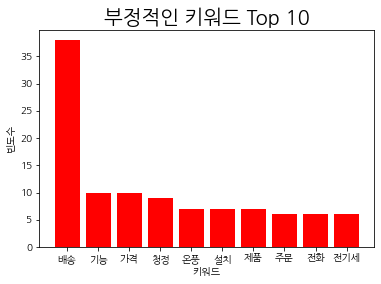

In [49]:
neg_groups = len(neg_type)
index_neg = np.arange(neg_groups)
plt.bar(index_neg, neg_val, tick_label = neg_type, color='r')
matplotlib.rc('font', family='NanumGothic')
plt.title('부정적인 키워드 Top 10',fontsize=20)
plt.xlabel('키워드') ## x축 라벨 출력
plt.ylabel('빈도수') ## y축 라벨 출력
plt.show()


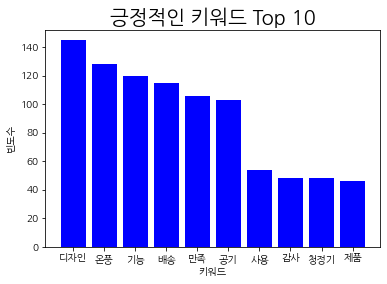

In [50]:
pos_groups = len(pos_type)
index_pos = np.arange(pos_groups)
plt.bar(index_pos, pos_val, tick_label = pos_type, color='b')
matplotlib.rc('font', family='NanumGothic')
plt.title('긍정적인 키워드 Top 10',fontsize=20)
plt.xlabel('키워드') ## x축 라벨 출력
plt.ylabel('빈도수') ## y축 라벨 출력
plt.show()
